# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

----

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right) = \dfrac{1}{\ell} \left( y^T - w^TX^T \right) \left( y - Xw \right)
$$

Распишем и получим:

$$
    Q(w) = \dfrac{1}{\ell} \left( y^Ty - y^TXw - (w^TX^T)y + w^TX^TXw \right)
$$

Теперь продифференцируем по вектору параметров w:

$$
    \nabla Q(w) = \dfrac{1}{\ell} \left( 0 - X^Ty - X^Ty + 2X^TXw \right)
$$

Упростим выражение:

$$
    \nabla Q(w) = \dfrac{2}{\ell} X^T \left( Xw - y \right)
$$

----

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)
assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

---

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/96170567/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/96170618/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/96171100/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/96170667/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/96170781/

---

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


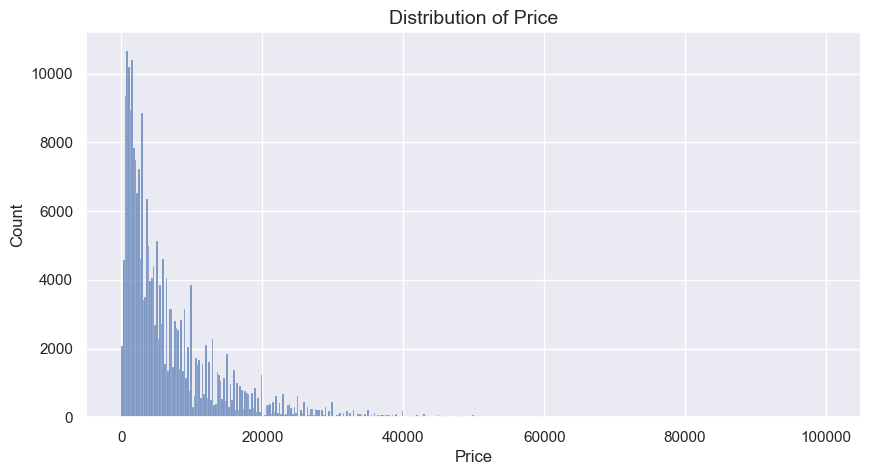

In [9]:
# Постройте график распределения целевой переменной в данных, подумайте, 
# нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? 
# Если да, то удалите их из данных.

plt.figure(figsize=(10, 5))
sns.histplot(data['price'])
plt.xlabel('Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Price', fontsize=14)
plt.show()

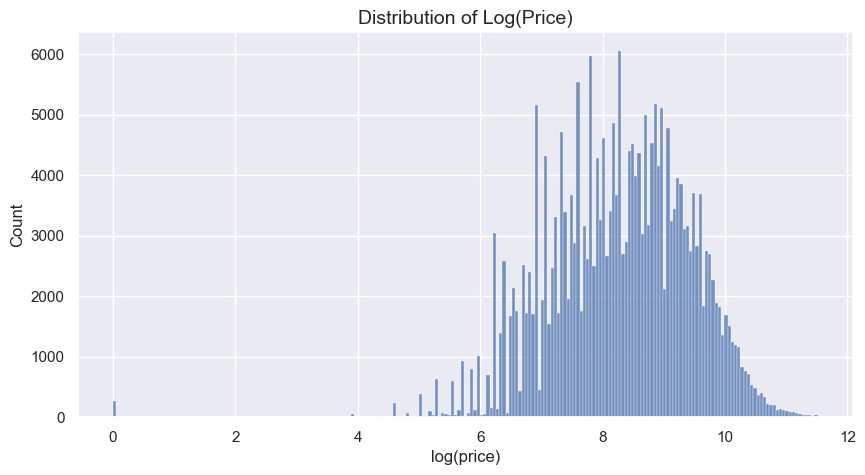

In [10]:
# Целевая переменная достаточно смещена влево,
# ее можно заменить на log
df = data.copy()

df['log_price'] = np.log(df['price'])

plt.figure(figsize=(10, 5))
sns.histplot(df['log_price'])
plt.xlabel('log(price)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Log(Price)', fontsize=14)
plt.show()

Outliers threshold: 19872.5
Num of outliers: 15617


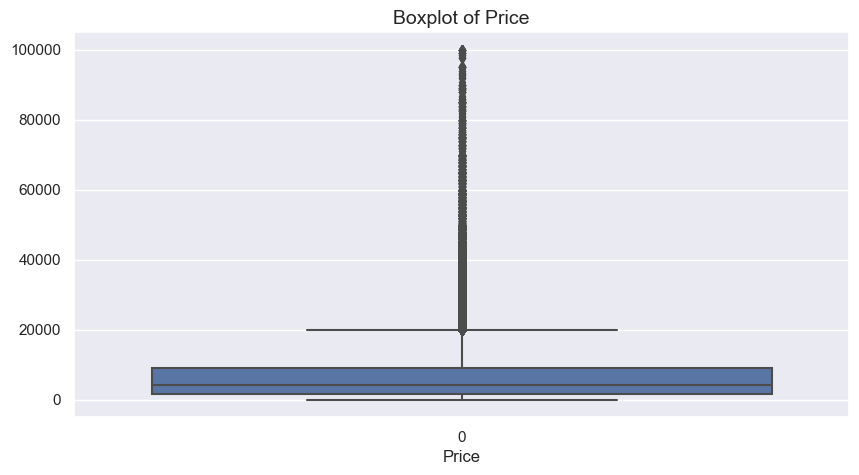

In [11]:
# Выбросы
# https://www.codecamp.ru/blog/find-outliers-with-iqr/
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
outlier_threshold = q3 + 1.5*iqr

outliers = df[df['price'] > outlier_threshold]['price']
print('Outliers threshold:', outlier_threshold)
print('Num of outliers:', outliers.shape[0])


plt.figure(figsize=(10, 5))
sns.boxplot(df['price'])
plt.xlabel('Price', fontsize=12)
plt.title('Boxplot of Price', fontsize=14)
plt.show()


In [12]:
# Удалим выбросы
df = df[df['price'] <= outlier_threshold]


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [13]:
print('NaNs presented:', df.isna().any().any())
print()
print(df.dtypes)

NaNs presented: False

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object


In [14]:
# Проведите исследование данных:
#   Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
#   Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
#   Подумайте, какие трансформации признаков из известных вам будет уместно применить;
#   Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.


In [15]:
categorical = []
numeric = []
other = []

for c in df.columns:
    if df[c].dtype in [np.int64, np.float64]:
        numeric += [c]
    elif df[c].dtype == np.object_:
        categorical += [c]
    else:
        other += [c]

numeric.remove('price')
numeric.remove('log_price')
print('Numeric features:', numeric)
print('\nCategorical features:', categorical)
print('\nOther features:', other)


Numeric features: ['powerPS', 'kilometer', 'autoAgeMonths']

Categorical features: ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']

Other features: []


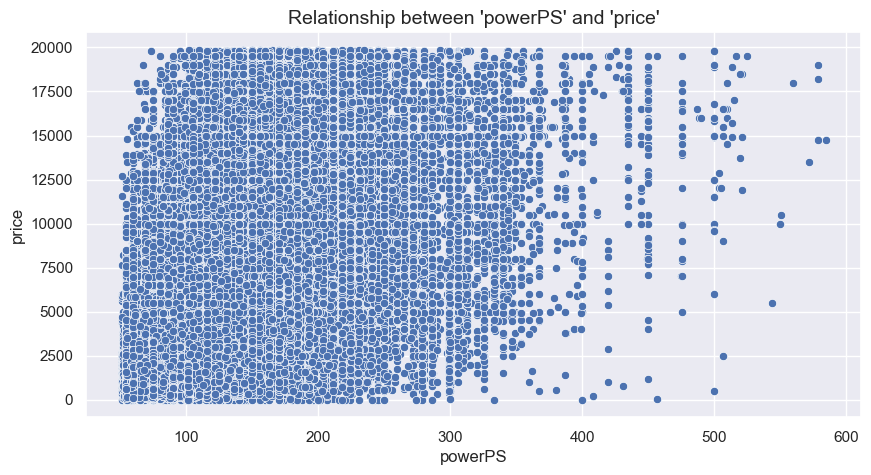

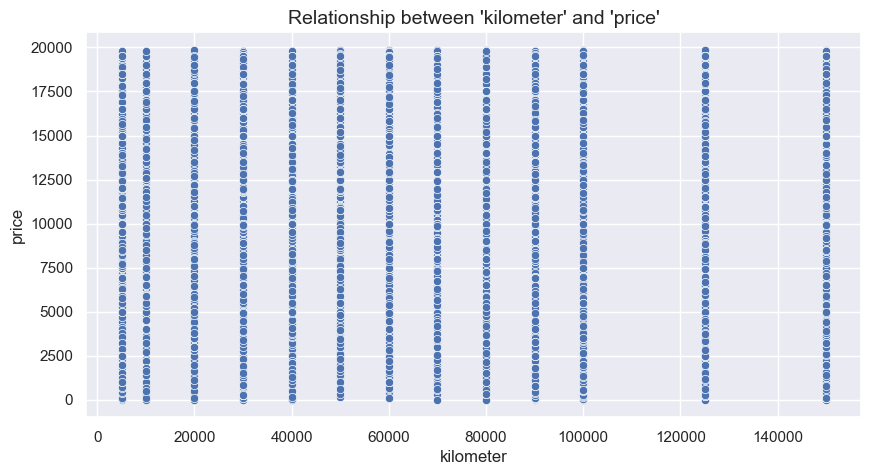

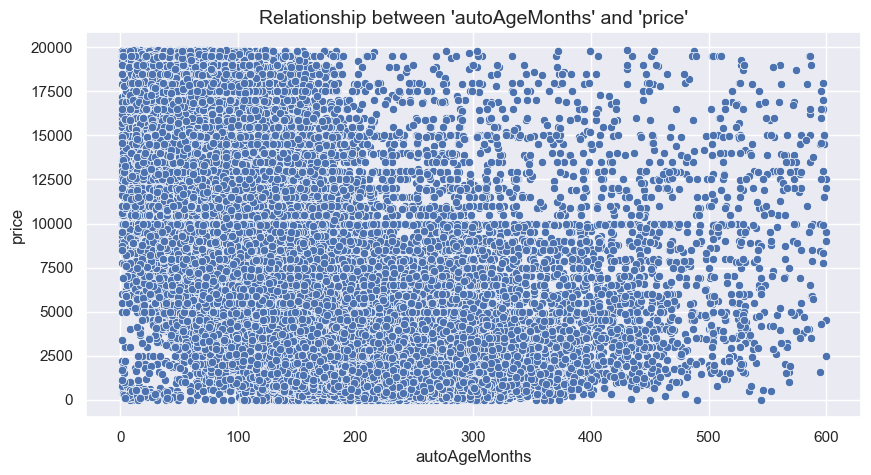

In [16]:
for feature in numeric:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x = df[feature], y = df['price'])
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('price', fontsize=12)
    plt.title(f'Relationship between \'{feature}\' and \'price\'', fontsize=14)
    plt.show()


In [17]:
# Можем заметить, что признак kilometer на самом деле категориальный
print('Kilometer categories:', df['kilometer'].unique())

km = 'kilometer'
df[km] = pd.Categorical(df[km])
numeric.remove(km)
categorical.append(km)


Kilometer categories: [150000  90000  70000 100000  60000  20000 125000  80000  50000  40000
  10000  30000   5000]


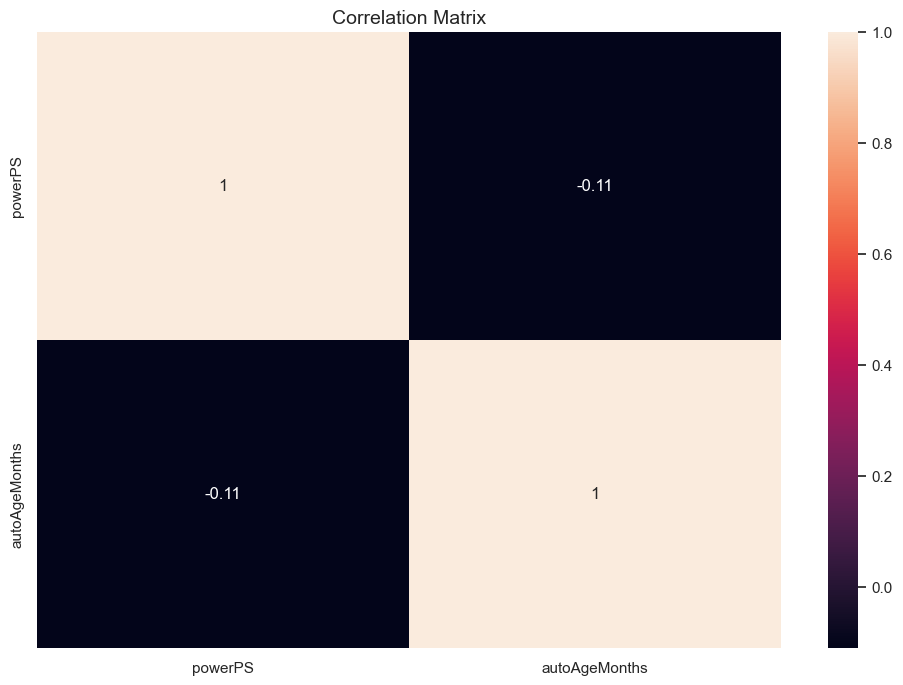

In [18]:
correlation_matrix = df[numeric].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix', fontsize=14)
plt.show()


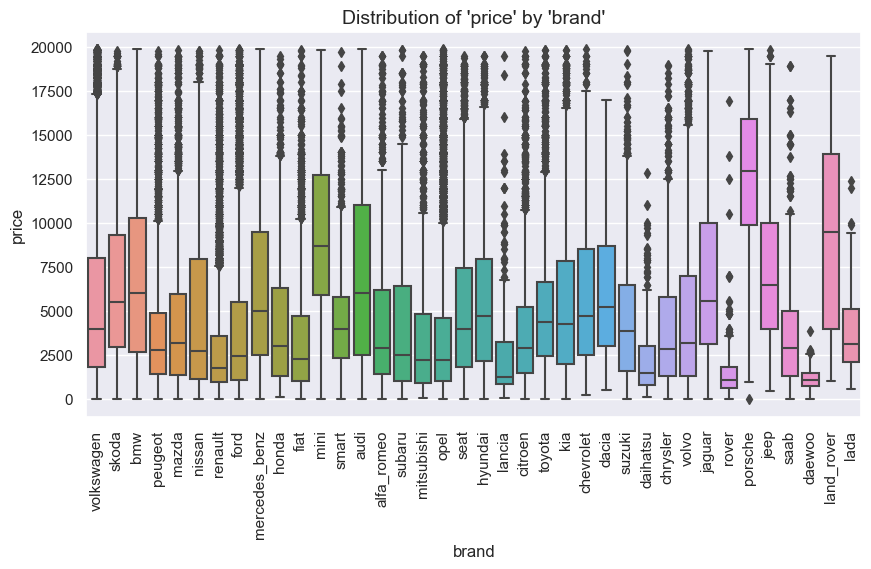

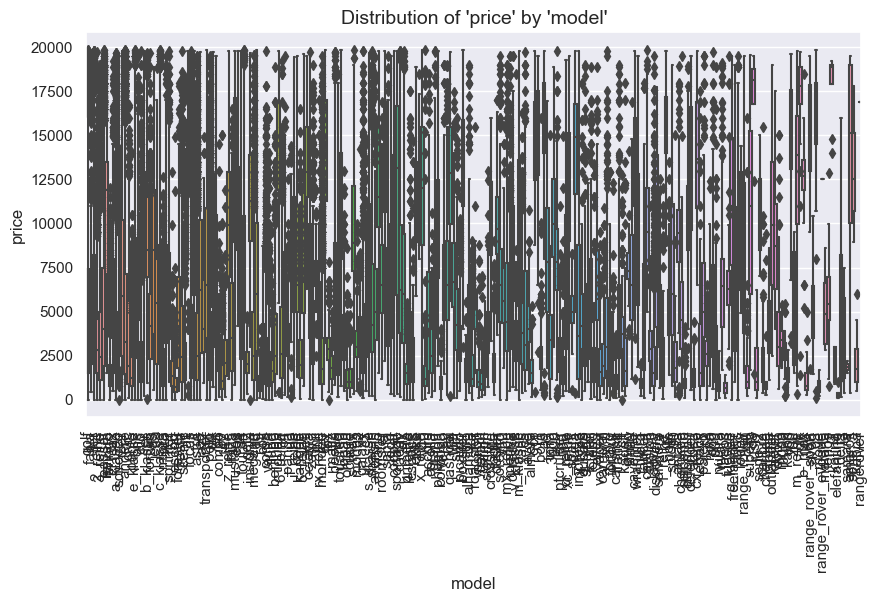

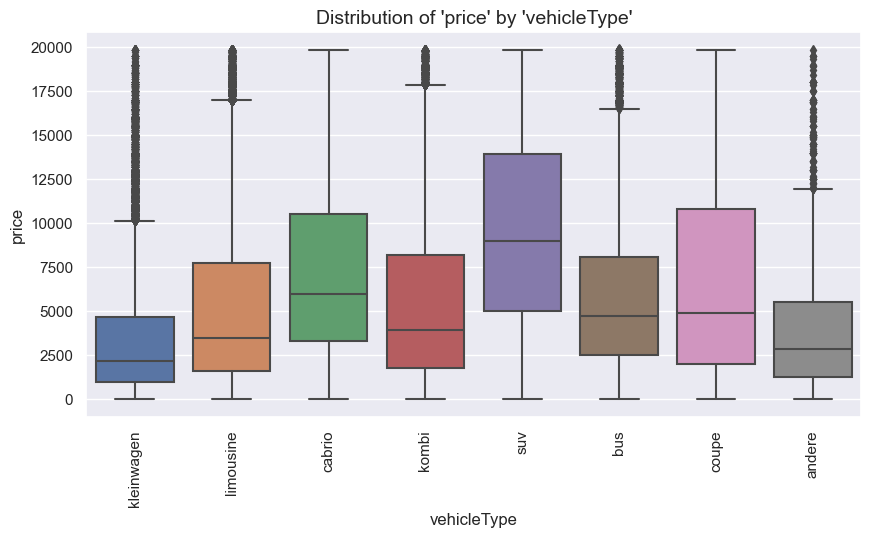

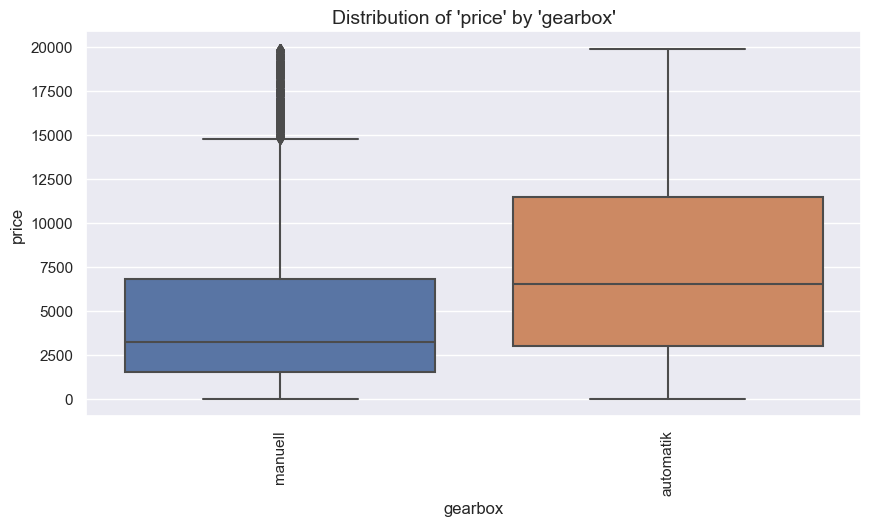

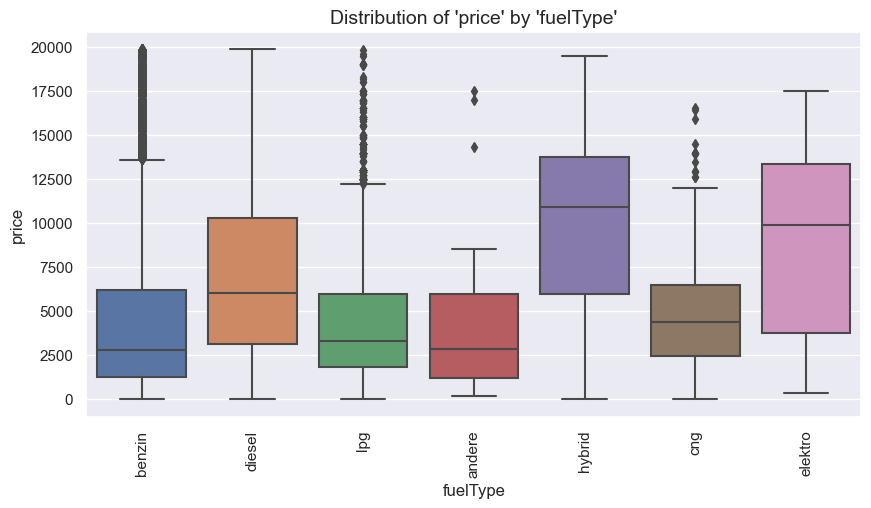

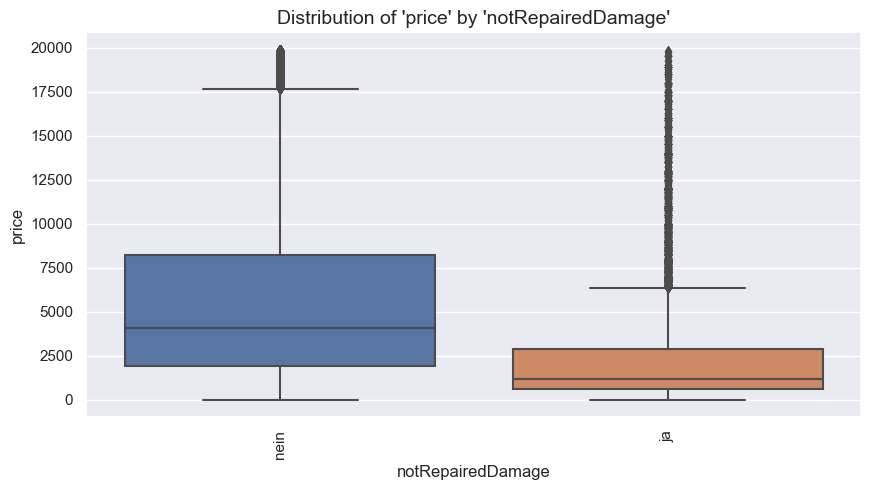

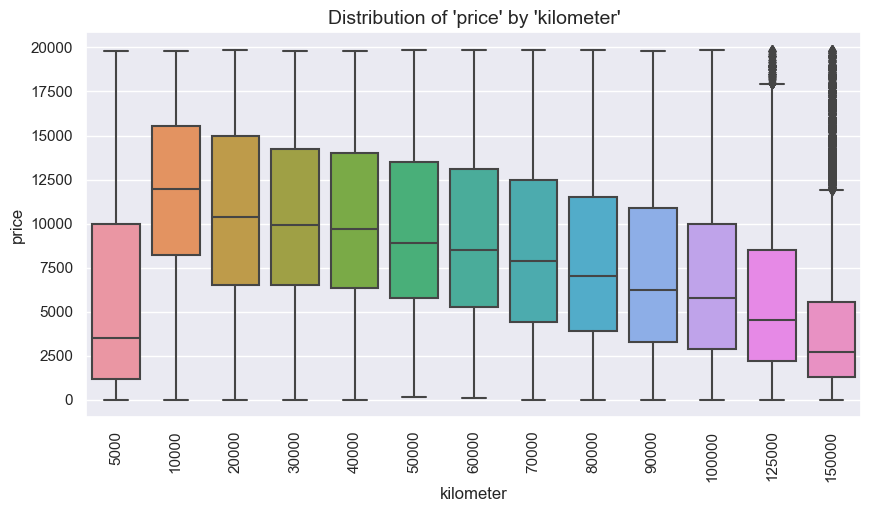

In [19]:
for feature in categorical:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x = df[feature], y = df['price'])
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('price', fontsize=12)
    plt.title(f'Distribution of \'price\' by \'{feature}\'', fontsize=14)
    plt.xticks(rotation=90)
    plt.show()


In [20]:
df['bias'] = 1
other += ['bias']

In [21]:
# Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


x = df[categorical + numeric + other]
y = df['log_price'].array

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x).A

train_x, val_test_x, train_y, val_test_y = train_test_split(x, y, test_size=0.2, random_state=42)
val_x, test_x, val_y, test_y = train_test_split(val_test_x, val_test_y, test_size=0.5, random_state=42)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

* ошибка на обучающей
* ошибка на тестовой
* $R^2$
* итерации

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [246]:
from sklearn.metrics import r2_score

def gen_and_learn_for_lambdas(cfg, lambdas):
    res = {'full': [], 'stochastic': [], 'momentum': [], 'adam': []}
    print('_' * len(lambdas))
    for d_name, models in res.items():
        cfg['descent_name'] = d_name
        print(d_name)
        for l in lambdas:
            cfg['kwargs']['lambda_'] = l;
            m = LinearRegression(cfg)
            m.fit(train_x, train_y)
            models.append(m)
            print('-',end='')
        print()
    return res

def collect_stats(models_by_d, logspace):
    collected_stats = pd.DataFrame(columns=['descent', 'lambda', 'it', 'loss_train', 'loss_test', 'r2'])
    for d_name, models in models_by_d.items():
        for i in range(len(logspace)):
            m = models[i]
            val_y_predicted = m.predict(val_x)
            collected_stats.loc[len(collected_stats)] = [ # type: ignore
                    d_name,
                    logspace[i], 
                    m.descent.lr.iteration,
                    m.calc_loss(train_x, train_y),
                    m.calc_loss(test_x, test_y),
                    r2_score(val_y, val_y_predicted)
                ]
    return collected_stats

def get_best_stats(stats):
    return stats.loc[stats.groupby('descent')['r2'].idxmax().values]

def gen_logspace(begin=0.001, end=1.5, n=10):
    return np.logspace(np.log10(begin), np.log10(end), n)

def teach_best(best_stats, cfg):
    res = {}
    model_names = ['full', 'stochastic', 'momentum', 'adam']
    for d in model_names:
        l = best_stats[best_stats['descent'] == d].iloc[0]['lambda']
        cfg['descent_name'] = d
        cfg['kwargs']['lambda_'] = l
        m = LinearRegression(cfg)
        m.fit(train_x, train_y)
        res[d] = m
        print(f'{d}[{l}] - done')
    return res
        

In [230]:
cfg = {
    'descent_name': '',
    'kwargs': {
        'dimension': x.shape[1],
    },
}

logspace = gen_logspace(begin=0.001, end=1.5, n=10)
descents = gen_and_learn_for_lambdas(cfg, logspace)


__________
full


----------
stochastic
----------
momentum
----------
adam
----------


In [231]:

stats = collect_stats(descents, logspace)
best_stats = get_best_stats(stats)
display(best_stats)


,descent,lambda,it,loss_train,loss_test,r2
38,adam,0.665568,247,0.342161,0.325343,0.706164
9,full,1.500000,77,0.410738,0.385313,0.651523
29,momentum,1.500000,232,0.351063,0.330660,0.700708
17,stochastic,0.295320,150,0.586832,0.551612,0.502993


In [247]:
best_models = teach_best(best_stats, cfg)


full[1.5] - done
stochastic[0.29532023238127764] - done
momentum[1.5] - done
adam[0.6655676889482516] - done


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

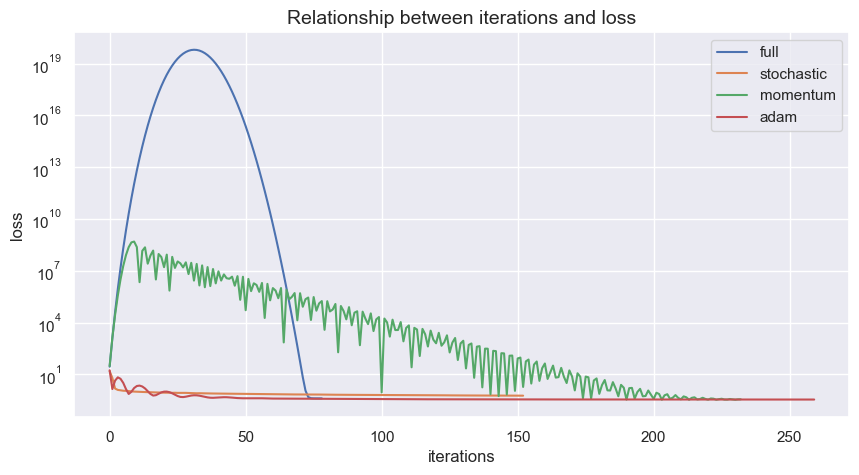

In [251]:
plt.figure(figsize=(10, 5))
for d, m in best_models.items():
  plt.plot(m.loss_history, label=d)
plt.xlabel('iterations', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.yscale('log')
plt.legend()
plt.title(f'Relationship between iterations and loss', fontsize=14)
plt.show()


<Figure size 1000x500 with 0 Axes>

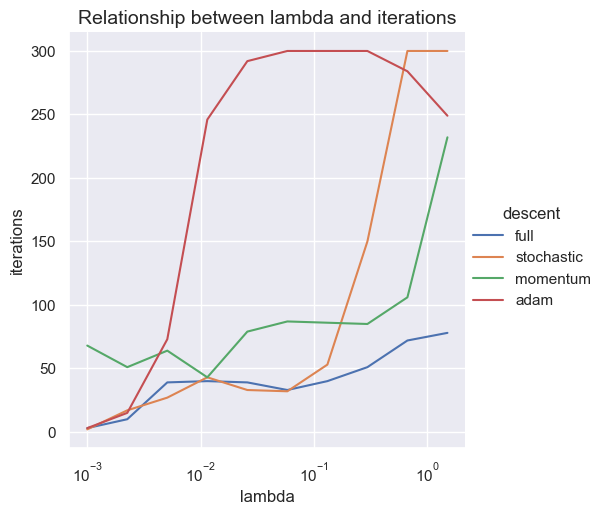

In [89]:
plt.figure(figsize=(10, 5))
sns.relplot(data=stats, x = 'lambda', y = 'it', hue='descent', kind='line')
plt.xlabel('lambda', fontsize=12)
plt.ylabel('iterations', fontsize=12)
plt.xscale('log')
plt.title('Relationship between lambda and iterations', fontsize=14)
plt.show()

In [90]:
print(stats.to_string())

       descent    lambda   it    loss_train     loss_test            r2
0         full  0.001000    3  2.737110e+01  2.737159e+01 -2.305080e+01
1         full  0.002254   10  1.619484e+01  1.625323e+01 -1.317857e+01
2         full  0.005079   39  1.345745e+01  1.353548e+01 -1.083921e+01
3         full  0.011447   40  4.451401e+00  4.483992e+00 -2.923408e+00
4         full  0.025799   39  1.865285e+00  1.865423e+00 -6.240486e-01
5         full  0.058143   33  1.310023e+00  1.291314e+00 -1.410104e-01
6         full  0.131037   40  1.035655e+00  1.001798e+00  1.116816e-01
7         full  0.295320   51  7.013213e-01  6.724906e-01  4.044455e-01
8         full  0.665568   72  5.089592e-01  4.827065e-01  5.677065e-01
9         full  1.500000   78  4.135072e-01  3.888799e-01  6.507471e-01
10  stochastic  0.001000    2  1.598892e+01  1.602612e+01 -1.301265e+01
11  stochastic  0.002254   17  2.501904e+01  2.509709e+01 -2.091395e+01
12  stochastic  0.005079   27  8.564945e+00  8.546713e+00 -6.473

---

```
слишком маленькие лямбда плохо, потому что мы очень медленно двигаемся (маленькое кол-во итераций свидетельствует о непреодалении tolerance)
Чем больше шаг тем больше итераций нам требуется и мы упираемся в лимит итераци.

На методе адам мы упираемся в кол-во итераций уже на небольших шагах и поэтому ему необходима большая лямбда чем на других моделях.

На графике ошибки/итерации видим с каким характером каждая модель побирается к оптимальным весам
```

---

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [32]:
import time

class Timer:
    def __init__(self):
        self.t = []
        self.a = 0
    def start(self):
        self.a = time.time()
    def stop(self):
        if self.a != 0:
            self.t += [time.time() - self.a]
        self.a = 0
    def restart(self):
        self.stop()
        self.start()
    def get_mean(self):
        return sum(self.t) / len(self.t)


In [101]:

batch_sizes = np.arange(5, 320, 10)
best_stoch_lambda = best_stats[best_stats['descent'] == 'stochastic'].iloc[0]['lambda']
cfg = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': x.shape[1],
        'lambda_': best_stoch_lambda,
    },
}
k = 10

stoch_stats = pd.DataFrame(columns=['batch_size', 'it', 'timings'])


print('_' * k)
for batch_size in batch_sizes:
    cfg['kwargs']['batch_size'] = batch_size;
    timer = Timer()
    it = 0

    print(batch_size)
    for i in range(k):
        m = LinearRegression(cfg)
        timer.start()
        m.fit(train_x, train_y)
        it += m.descent.lr.iteration
        timer.stop()
        print('-',end='')
    print()
    
    stoch_stats.loc[len(stoch_stats)] = [ # type: ignore
            batch_size,
            it / k,
            timer.get_mean(),
        ]



__________
5
----------
15
----------
25
----------
35
----------
45
----------
55
----------
65
----------
75
----------
85
----------
95
----------
105
----------
115
----------
125
----------
135
----------
145
----------
155
----------
165
----------
175
----------
185
----------
195
----------
205
----------
215
----------
225
----------
235
----------
245
----------
255
----------
265
----------
275
----------
285
----------
295
----------
305
----------
315
----------


In [ ]:
tmp = LinearRegression(cfg)
m.fit(train_x, train_y)
m.descent.lr.iteration


<Figure size 1000x500 with 0 Axes>

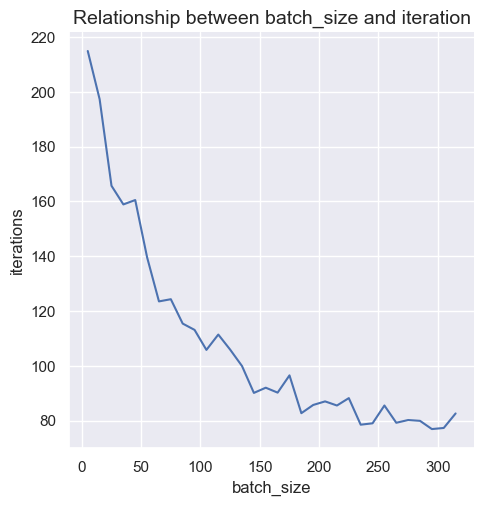

In [106]:
plt.figure(figsize=(10, 5))
sns.relplot(data=stoch_stats, x = 'batch_size', y = 'it', kind='line')
plt.xlabel('batch_size', fontsize=12)
plt.ylabel('iterations', fontsize=12)
plt.title(f'Relationship between batch_size and iteration', fontsize=14)
plt.show()

<Figure size 1000x500 with 0 Axes>

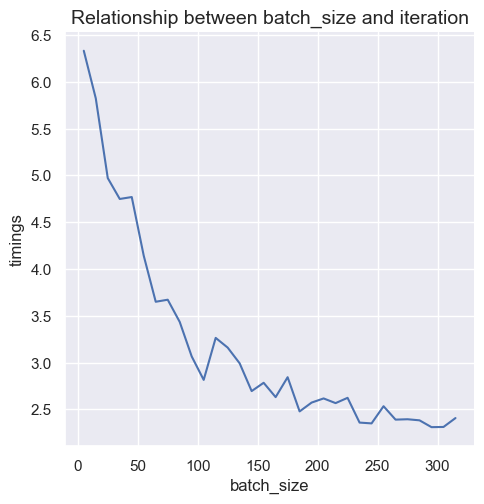

In [107]:
plt.figure(figsize=(10, 5))
sns.relplot(data=stoch_stats, x = 'batch_size', y = 'timings', kind='line')
plt.xlabel('batch_size', fontsize=12)
plt.ylabel('timings', fontsize=12)
plt.title(f'Relationship between batch_size and iteration', fontsize=14)
plt.show()

```
Чем меньше батч тем больше вероятность пойти не в том направлении, а значит чтобы найти минимум нужно больше итераций (соответственно и общего времени)
```

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

---

$$
\nabla Q(w) = \dfrac{2}{\ell} X^T \left( Xw - y \right) + \mu w
$$

---

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

---

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/96725240/
  
---

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [108]:
cfg = {
    'descent_name': '',
    'regularized': True,
    'kwargs': {
        'dimension': x.shape[1],
    },
}

def gen_logspace(begin=0.0001, end=1.0, n=10):
    return np.logspace(np.log10(begin), np.log10(end), n)

lambda_logspace = gen_logspace(begin=0.1, end=1.5, n=5)
mu_logspace = gen_logspace(begin=0.0001, end=0.1, n=5)


reg_descents = {'full': [], 'stochastic': [], 'momentum': [], 'adam': []}

print(('_' * len(lambda_logspace) + '.') * (len(mu_logspace)))
for d_name, models in reg_descents.items():
    cfg['descent_name'] = d_name
    print(d_name)
    for lambda_ in lambda_logspace:
        for mu in mu_logspace:
            cfg['kwargs']['lambda_'] = lambda_;
            cfg['kwargs']['mu'] = mu
            m = LinearRegression(cfg)
            m.fit(train_x, train_y)
            models.append(m)
            print('-',end='')
        print('|',end='')
    print()
    


_____._____._____._____._____.
full


-----|-----|-----|-----|-----|
stochastic
-----|-----|-----|-----|-----|
momentum
-----|-----|-----|-----|-----|
adam
-----|-----|-----|-----|-----|


In [154]:
from sklearn.metrics import r2_score

reg_stats = pd.DataFrame(columns=['descent', 'lambda', 'mu', 'it', 'loss_train', 'loss_test', 'r2'])

for d_name, models in reg_descents.items():
    for i in range(len(lambda_logspace)):
        for j in range(len(mu_logspace)):
            m = models[i*len(lambda_logspace) + j]
            val_y_predicted = m.predict(val_x)
            reg_stats.loc[len(reg_stats)] = [ # type: ignore
                    d_name,
                    lambda_logspace[i],
                    mu_logspace[j],
                    m.descent.lr.iteration,
                    m.calc_loss(train_x, train_y),
                    m.calc_loss(test_x, test_y),
                    r2_score(val_y, val_y_predicted)
                ]


In [262]:
# best
best_reg_stats = reg_stats.loc[reg_stats[(reg_stats['it'] < 300)].groupby('descent')['r2'].idxmax().values]
best_reg_stats

,descent,lambda,mu,it,loss_train,loss_test,r2
85,adam,0.387298,0.000100,276,0.382912,0.364098,0.674055
20,full,1.500000,0.000100,192,0.469715,0.442137,0.605561
66,momentum,0.762199,0.000562,288,0.372387,0.350188,0.685937
35,stochastic,0.387298,0.000100,234,0.745151,0.713515,0.366774


In [263]:
best_reg_stats[best_reg_stats['descent'] == 'full'].iloc[0]['lambda']

1.5

In [266]:
def teach_best_lambda_mu(best_stats, cfg):
    res = {}
    model_names = ['full', 'stochastic', 'momentum', 'adam']
    for d in model_names:
        l = best_stats[best_stats['descent'] == d].iloc[0]['lambda']
        mu = best_stats[best_stats['descent'] == d].iloc[0]['mu']
        cfg['descent_name'] = d
        cfg['kwargs']['lambda_'] = l
        cfg['kwargs']['mu'] = mu
        m = LinearRegression(cfg)
        m.fit(train_x, train_y)
        res[d] = m
        print(f'{d}[{l}, {mu}] - done')
    return res

In [267]:
cfg = {
    'descent_name': '',
    'regularized': True,
    'kwargs': {
        'dimension': x.shape[1],
    },
}

best_reg_models = teach_best_lambda_mu(best_reg_stats, cfg)

,descent,lambda,mu,it,loss_train,loss_test,r2
85,adam,0.387298,0.000100,276,0.382912,0.364098,0.674055
20,full,1.500000,0.000100,192,0.469715,0.442137,0.605561
66,momentum,0.762199,0.000562,288,0.372387,0.350188,0.685937
35,stochastic,0.387298,0.000100,234,0.745151,0.713515,0.366774


full


full[1.5, 0.0001] - done
stochastic
stochastic[0.38729833462074176, 0.0001] - done
momentum
momentum[0.7621991222319222, 0.0005623413251903491] - done
adam
adam[0.38729833462074176, 0.0001] - done


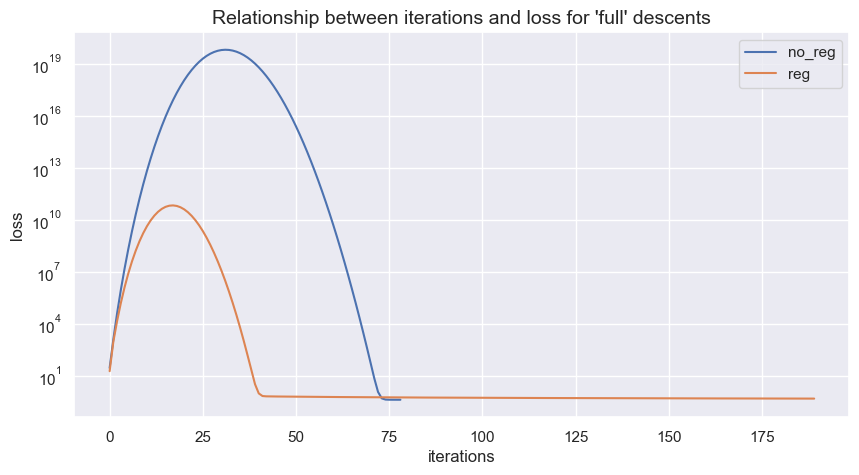

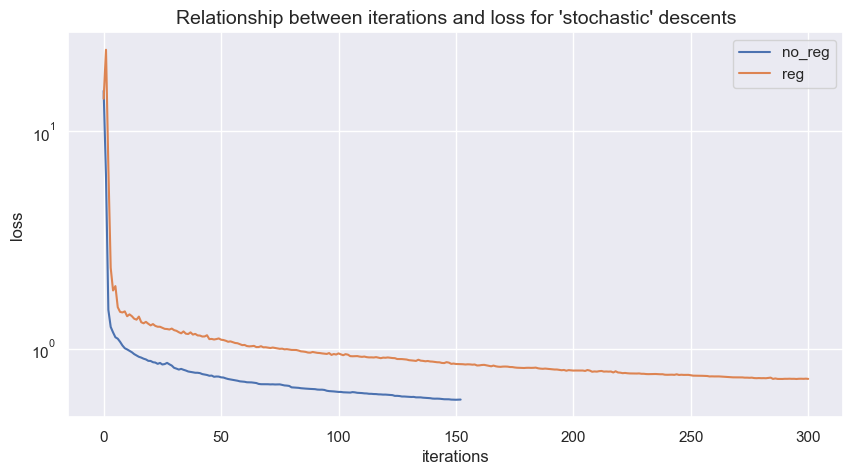

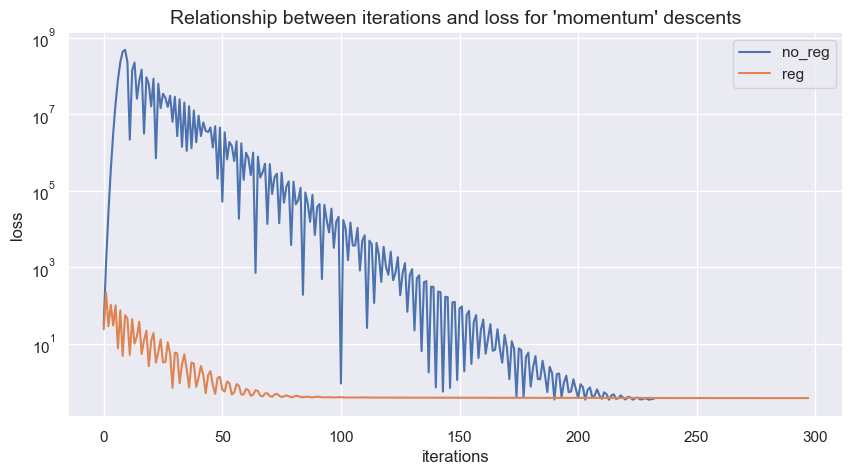

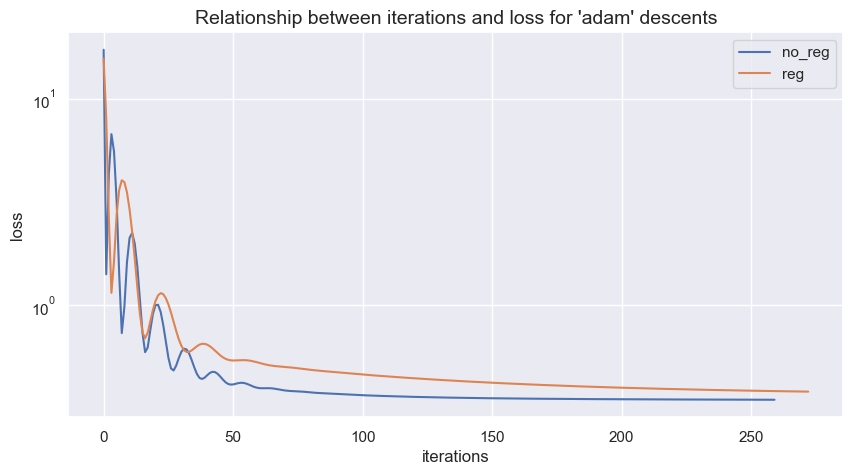

In [269]:

for d, m in best_models.items():
  plt.figure(figsize=(10, 5))
  reg_m = best_reg_models[d]
  plt.plot(m.loss_history, label='no_reg')
  plt.plot(reg_m.loss_history, label='reg')
  plt.legend()
  plt.xlabel('iterations', fontsize=12)
  plt.ylabel('loss', fontsize=12)
  plt.yscale('log')
  plt.title(f'Relationship between iterations and loss for \'{d}\' descents', fontsize=14)
  plt.show()

<Figure size 1000x500 with 0 Axes>

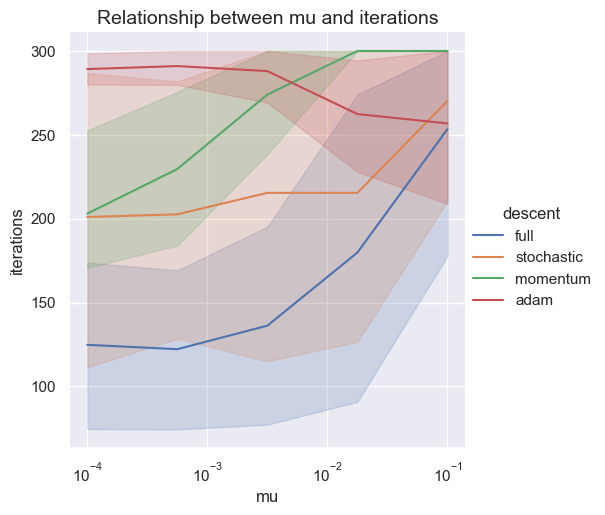

In [163]:
plt.figure(figsize=(10, 5))
sns.relplot(data=reg_stats, x = 'mu', y = 'it', hue='descent', kind='line')
plt.xlabel('mu', fontsize=12)
plt.ylabel('iterations', fontsize=12)
plt.xscale('log')
plt.title('Relationship between mu and iterations', fontsize=14)
plt.show()

<Figure size 1000x500 with 0 Axes>

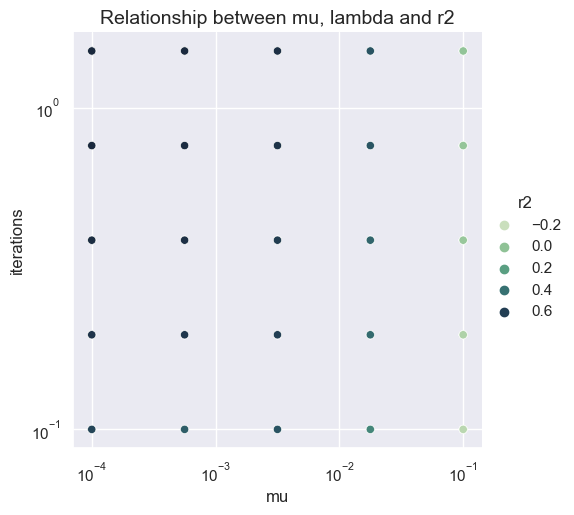

In [275]:
plt.figure(figsize=(10, 5))
sns.relplot(data=reg_stats[reg_stats['r2'] > -1], x = 'mu', y = 'lambda', hue='r2', palette="ch:r=-.5,l=.95")
plt.xlabel('mu', fontsize=12)
plt.ylabel('iterations', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.title('Relationship between mu, lambda and r2', fontsize=14)
plt.show()

In [162]:
display(best_stats)
display(best_reg_stats)


,descent,lambda,it,loss_train,loss_test,r2
39,adam,1.50000,249,0.346576,0.328331,0.702852
9,full,1.50000,78,0.413507,0.388880,0.650747
29,momentum,1.50000,232,0.351153,0.330019,0.699741
17,stochastic,0.29532,150,0.562875,0.531218,0.524103


,descent,lambda,mu,it,loss_train,loss_test,r2
85,adam,0.387298,0.000100,276,0.382912,0.364098,0.674055
20,full,1.500000,0.000100,192,0.469715,0.442137,0.605561
66,momentum,0.762199,0.000562,288,0.372387,0.350188,0.685937
35,stochastic,0.387298,0.000100,234,0.745151,0.713515,0.366774


In [182]:
print(reg_stats.to_string())

       descent    lambda        mu   it    loss_train     loss_test            r2
0         full  0.100000  0.000100   41  1.407746e+00  1.404654e+00 -2.133843e-01
1         full  0.100000  0.000562   43  1.432445e+00  1.423929e+00 -2.430570e-01
2         full  0.100000  0.003162   45  1.481805e+00  1.445225e+00 -2.903682e-01
3         full  0.100000  0.017783   38  1.286434e+00  1.266429e+00 -1.139382e-01
4         full  0.100000  0.100000  111  1.496009e+00  1.461524e+00 -2.864042e-01
5         full  0.196799  0.000100   82  1.196453e+00  1.159862e+00 -2.472265e-02
6         full  0.196799  0.000562   87  1.238669e+00  1.221919e+00 -6.305956e-02
7         full  0.196799  0.003162   85  1.277460e+00  1.249438e+00 -9.255121e-02
8         full  0.196799  0.017783   91  1.165905e+00  1.130306e+00  8.926568e-04
9         full  0.196799  0.100000  256  1.274787e+00  1.244883e+00 -8.925251e-02
10        full  0.387298  0.000100  125  8.225323e-01  7.891148e-01  3.041630e-01
11        full  

```
Регуляризация снизила колебание ошибки и улучшила full и momentum
Для остальных ухудшилась картина.
Чем больше mu тем менее адекватной становится наша модель.
Однако итоговый подбор параметров оказался по качеству и по ошибке на разных частях чуть хуже. (нужно просто более тщательно подбирать и больше итераций делать)
```

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

---

$$
    L(w)
    =
    \log\left(\cosh(Xw - y)\right).
$$

$$
    L'(w) = (\tanh(Xw - y))^T X
$$

$$
    \nabla L(w) = X^T \tanh(Xw - y)
$$
---

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [214]:
# Переобучаю модели с mse на на другом разбросе лямбд чтобы найти более оптимальные и сравнить более адекватно
cfg = {
    'descent_name': '',
    'kwargs': {
        'dimension': x.shape[1],
    },
}

new_logspace = gen_logspace(begin=0.1, end=1.7, n=10)
new_descents = gen_and_learn_for_lambdas(cfg, new_logspace)


__________
full


----------
stochastic
----------
momentum
----------
adam
----------


In [219]:
new_stats = collect_stats(new_descents, new_logspace)
best_new_stats = get_best_stats(new_stats)
display(best_new_stats)
display(new_stats)

,descent,lambda,it,loss_train,loss_test,r2
39,adam,1.700000,188,0.342313,0.324505,0.705898
9,full,1.700000,98,0.396742,0.374863,0.663671
27,momentum,0.905766,119,0.356536,0.336251,0.695660
15,stochastic,0.482595,259,0.451811,0.430285,0.616158


,descent,lambda,it,loss_train,loss_test,r2
0,full,0.100000,35,1.170524e+00,1.154696e+00,-9.041057e-03
1,full,0.136999,32,9.416569e-01,9.097777e-01,1.970390e-01
2,full,0.187687,50,8.774575e-01,8.424663e-01,2.514882e-01
3,full,0.257128,58,7.827704e-01,7.522616e-01,3.326139e-01
4,full,0.352262,64,6.396644e-01,6.067320e-01,4.538456e-01
5,full,0.482595,66,5.614032e-01,5.310490e-01,5.242246e-01
6,full,0.661149,82,5.134509e-01,4.896001e-01,5.619980e-01
7,full,0.905766,71,4.546082e-01,4.298300e-01,6.157687e-01
8,full,1.240887,70,4.327835e-01,4.081413e-01,6.356351e-01
9,full,1.700000,98,3.967415e-01,3.748630e-01,6.636711e-01


In [276]:
cfg = {
    'descent_name': '',
    'kwargs': {
        'dimension': x.shape[1],
    },
}
best_new_models = teach_best(best_new_stats, cfg)

full[1.7] - done
stochastic[0.48259490674452493] - done
momentum[0.9057656106662986] - done
adam[1.7] - done


In [216]:
from descents import LossFunction
cfg = {
    'descent_name': '',
    'kwargs': {
        'dimension': x.shape[1],
        'loss_function': LossFunction.LogCosh
    },
}

lc_logspace = new_logspace
lc_descents = gen_and_learn_for_lambdas(cfg, lc_logspace)


__________
full


----------
stochastic
----------
momentum
----------
adam
----------


In [221]:
lc_stats = collect_stats(lc_descents, lc_logspace)
best_lc_stats = get_best_stats(lc_stats)
display(best_new_stats)
display(best_lc_stats)
display(lc_stats)

,descent,lambda,it,loss_train,loss_test,r2
39,adam,1.700000,188,0.342313,0.324505,0.705898
9,full,1.700000,98,0.396742,0.374863,0.663671
27,momentum,0.905766,119,0.356536,0.336251,0.695660
15,stochastic,0.482595,259,0.451811,0.430285,0.616158


,descent,lambda,it,loss_train,loss_test,r2
38,adam,1.240887,300,0.114436,0.111401,0.704214
9,full,1.700000,86,0.191317,0.184594,0.530977
29,momentum,1.700000,128,0.124566,0.121007,0.683260
19,stochastic,1.700000,300,0.152474,0.146618,0.620845


,descent,lambda,it,loss_train,loss_test,r2
0,full,0.100000,64,0.862138,0.868368,-1.641862
1,full,0.136999,55,0.725059,0.732058,-1.057358
2,full,0.187687,50,0.404412,0.408476,0.012716
3,full,0.257128,46,0.417383,0.415495,-0.055185
4,full,0.352262,49,0.403300,0.402372,-0.019703
5,full,0.482595,49,0.314796,0.310030,0.217662
6,full,0.661149,57,0.320311,0.311919,0.175195
7,full,0.905766,68,0.255277,0.248184,0.366160
8,full,1.240887,78,0.219507,0.214001,0.466494
9,full,1.700000,86,0.191317,0.184594,0.530977


In [277]:
cfg = {
    'descent_name': '',
    'kwargs': {
        'dimension': x.shape[1],
        'loss_function': LossFunction.LogCosh
    },
}
best_lc_models = teach_best(best_lc_stats, cfg)

full[1.7] - done
stochastic[1.7] - done
momentum[1.7] - done
adam[1.240887399457625] - done


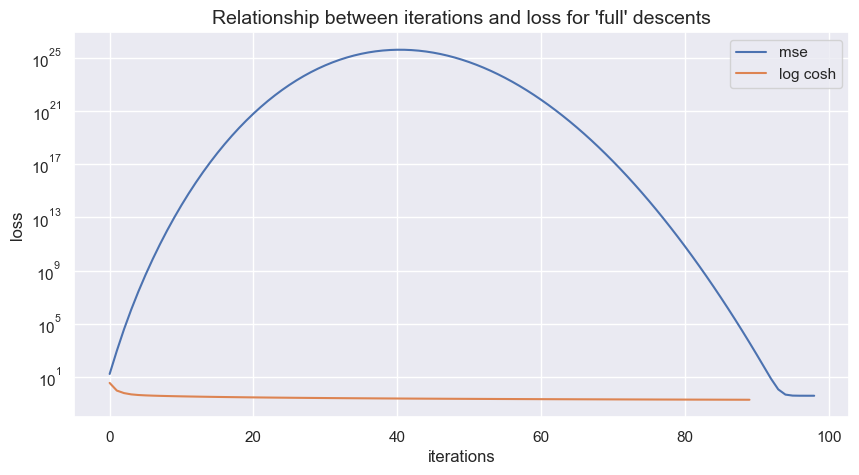

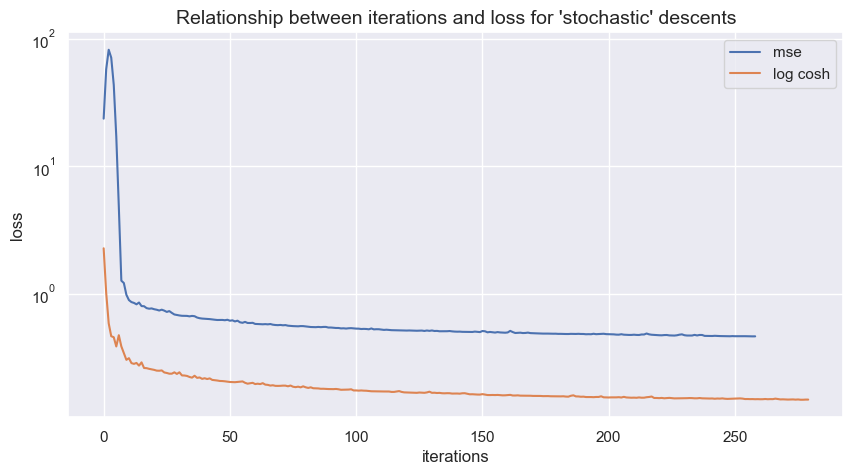

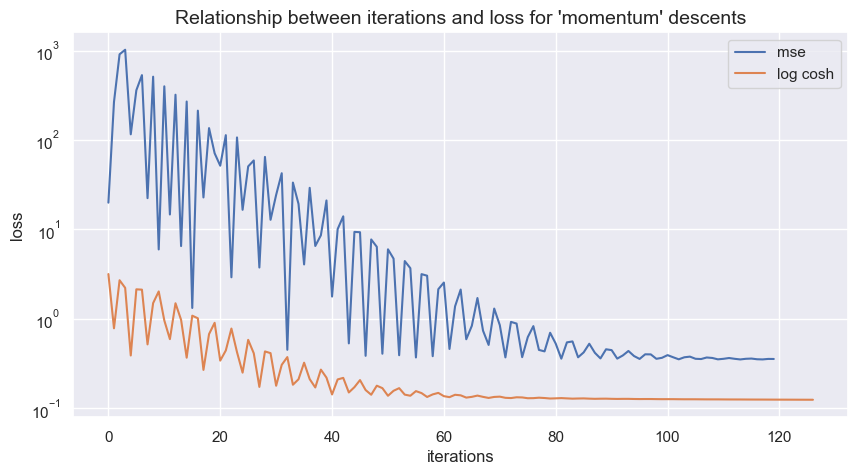

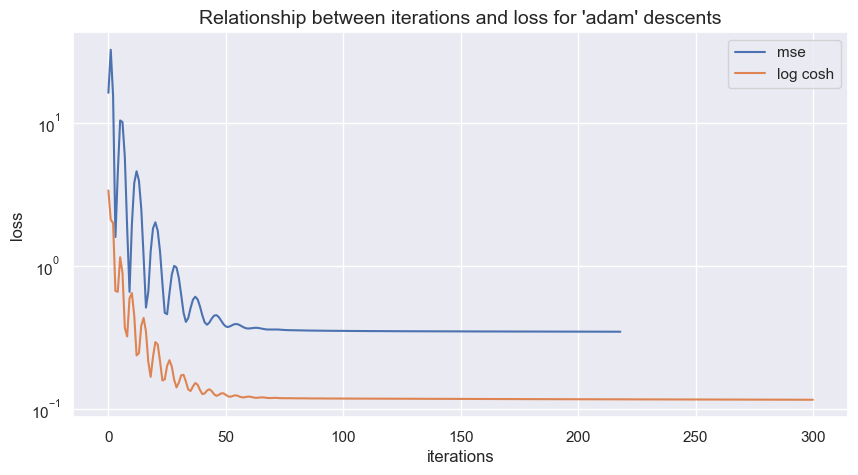

In [278]:
for d, m in best_new_models.items():
  plt.figure(figsize=(10, 5))
  lc_m = best_lc_models[d]
  plt.plot(m.loss_history, label='mse')
  plt.plot(lc_m.loss_history, label='log cosh')
  plt.legend()
  plt.xlabel('iterations', fontsize=12)
  plt.ylabel('loss', fontsize=12)
  plt.yscale('log')
  plt.title(f'Relationship between iterations and loss for \'{d}\' descents', fontsize=14)
  plt.show()

```
Можно заметить что результаты(r2) стали чуть хуже чем при mse, (но кажется это можно было бы решить еще более тщательным подбором параметров и увеличением максимума итераций (но это на моей картошке считается очень медленно (а жизнь не щедра на время (сори за нытье))))

Однако log_cosh в роли оценки ошибки улучшил для всех моделей картину сходимости
```

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

---

```
Из-за работы и учебы у меня не осталось друзей и близких.
Единственный, кто у меня остался, и к кому я могу обратиться среди ночи, - это мой верный черный конь.
Но даже при этом мы все равно редко видимся, потому что я передвигаюсь обычно на общественно транспорте, 
Мой старый и верный друг (он же Mitsubishi Lancer 9 Sport Wagon (буквально спорт вагон, универсал с 2 литрами под капотом)) не привередлив к еде, поэтому обычно я кормлю его 92 бензином (особенно приятно при текущих ценах).

В эту прекрасную пору я решил побаловать своего верного коня приятным сюрпризом: романтический ужин на заправке не при свечах (это пожароопасно). Блюдо вечера(ночи) - самый чистый и выдержанный АИ95, из подземелий нашей необъятной.

Рецепт:
Индигредиенты: 
  - переработанная нефть, 
  - природный газ,
  - газовый конденсат, 
  - уголь, 
  - торф, 
  - горючие сланцы,
  - продукты синтеза водорода и окиси углерода (по вкусу).
Приготовление: 
  1. Первичная обработка нефти. 
  2. Вторичная обработка нефти. 
  3. Собираем сливки и блюдо готово.

Мой конь не очень любин фоткаться, но вот это (literally) я на его фоне (и нет, это не Райан Гослинг):
```

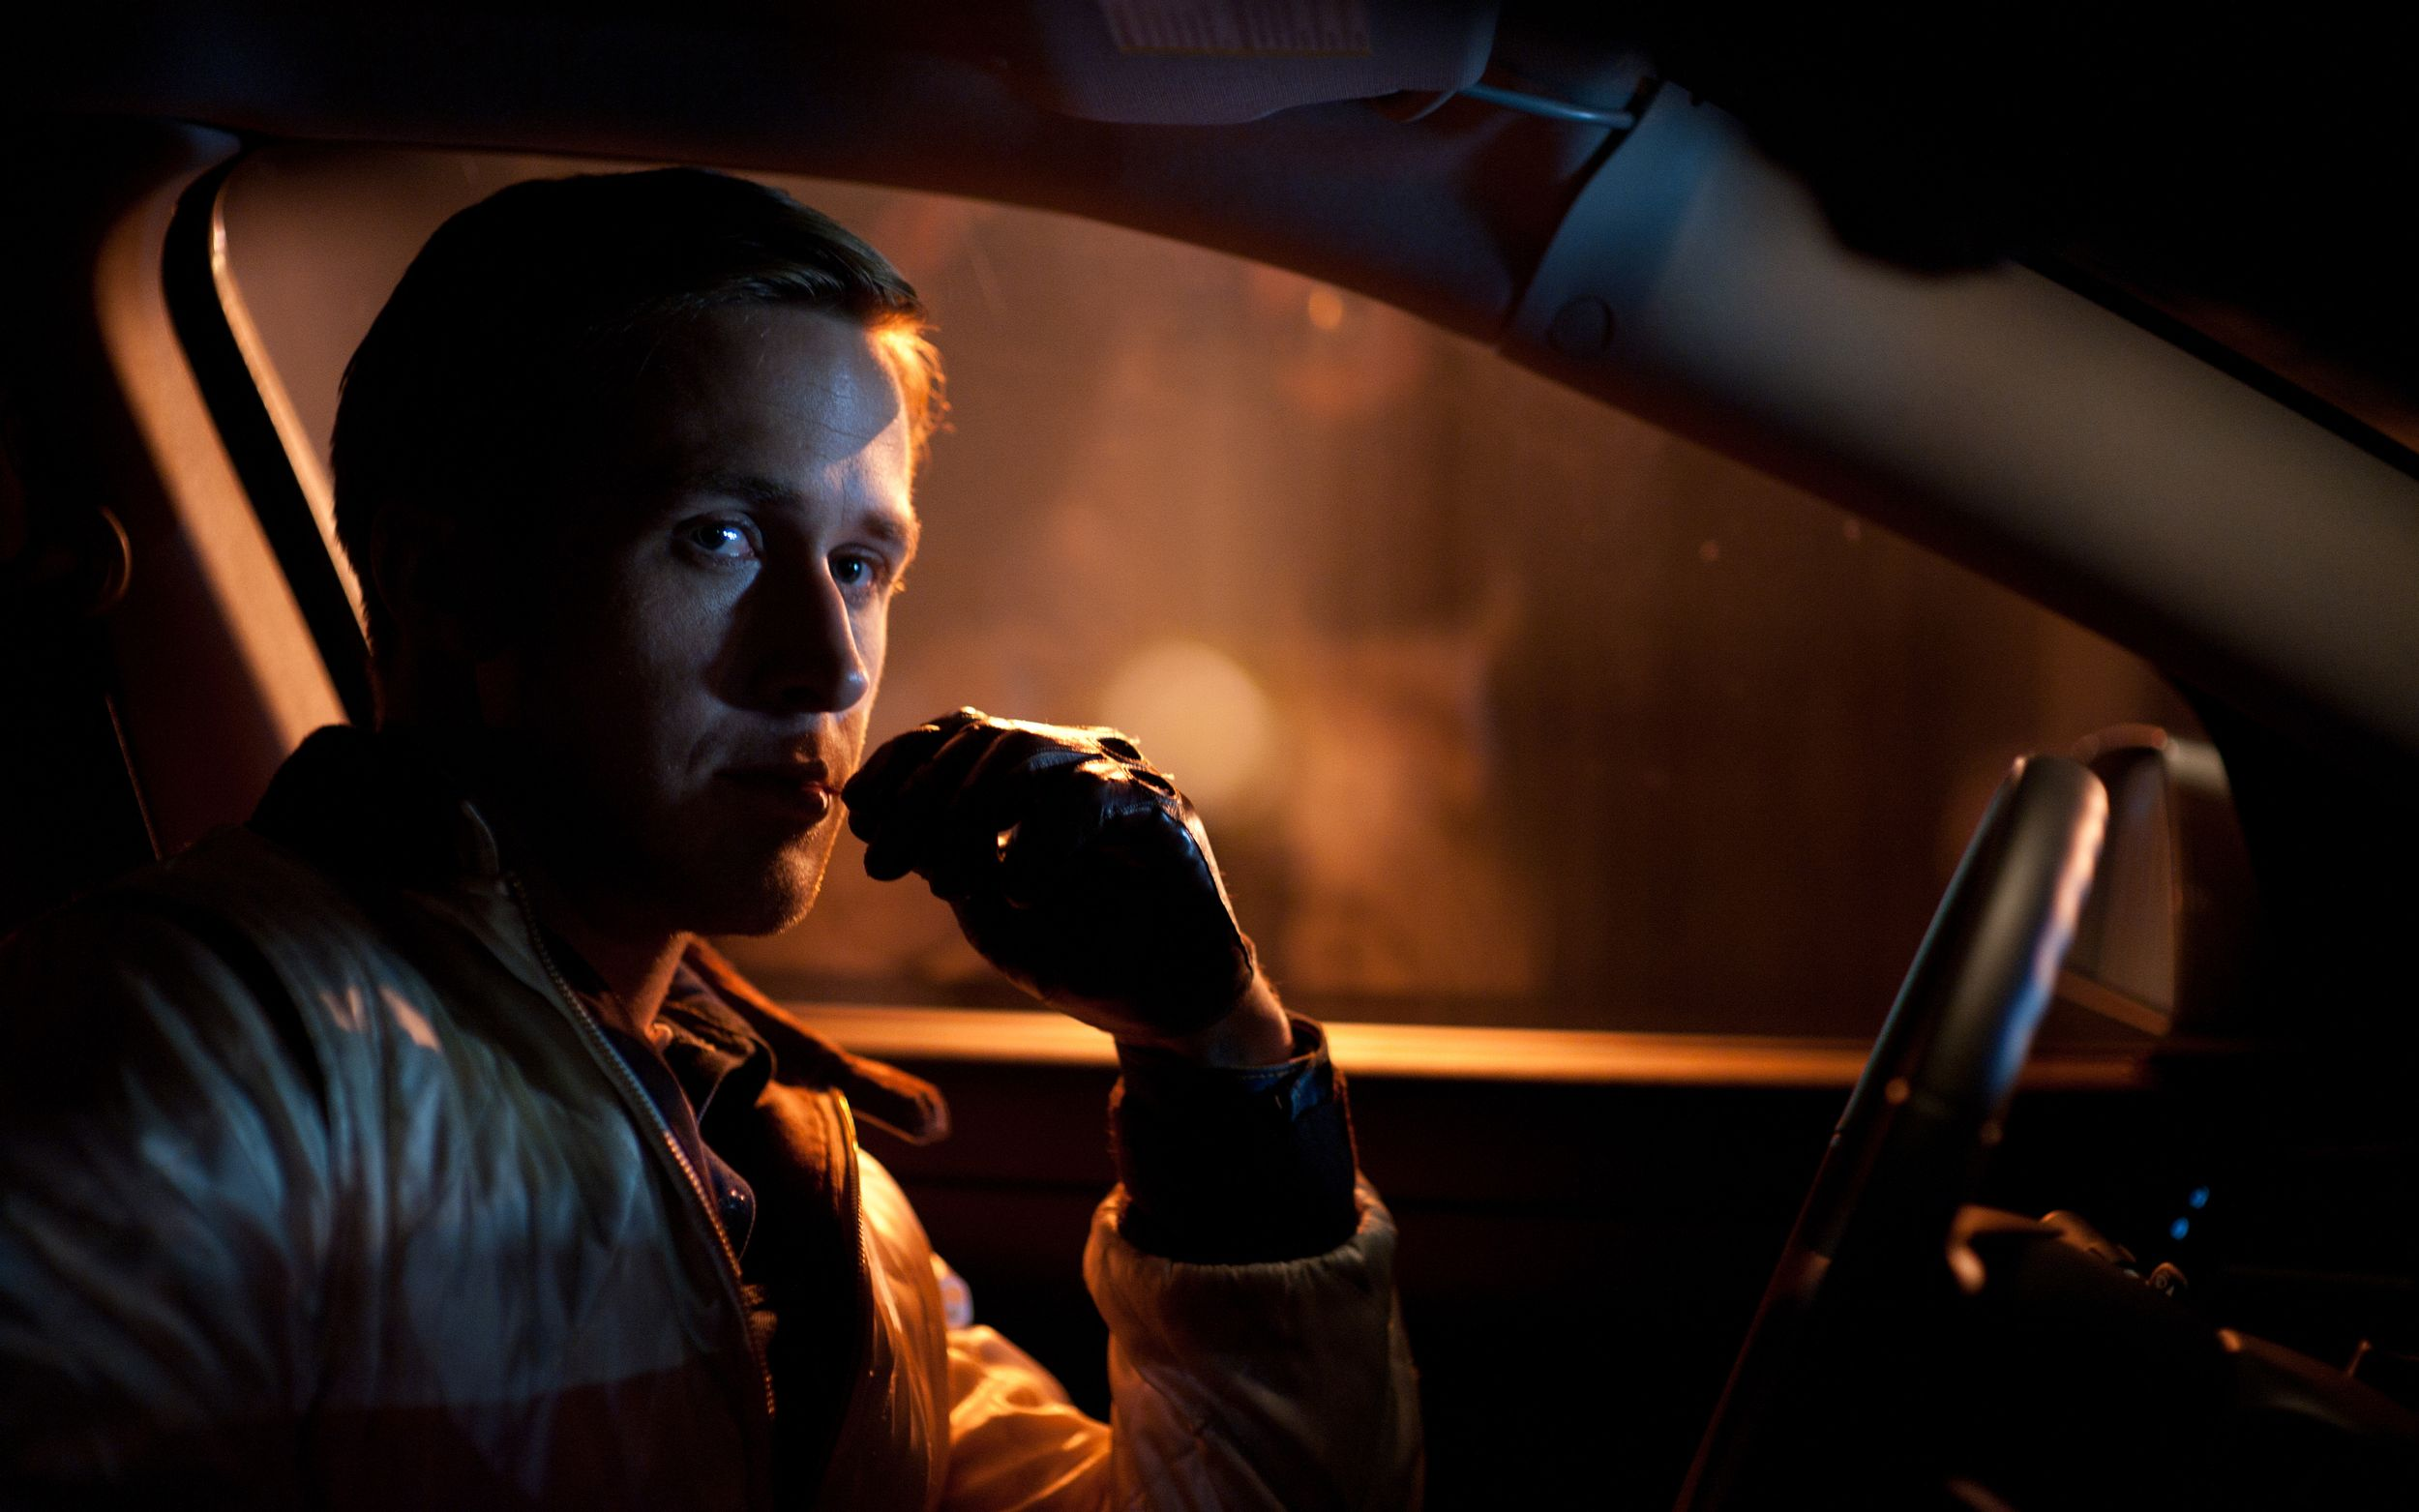

---

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: